In [11]:
import yfinance as yf, matplotlib.pyplot as plt
sp = yf.download("^GSPC", start = "2010-01-01", end = "2020-10-10")
cac = yf.download("^FCHI", start = "2010-01-01", end = "2020-10-10")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


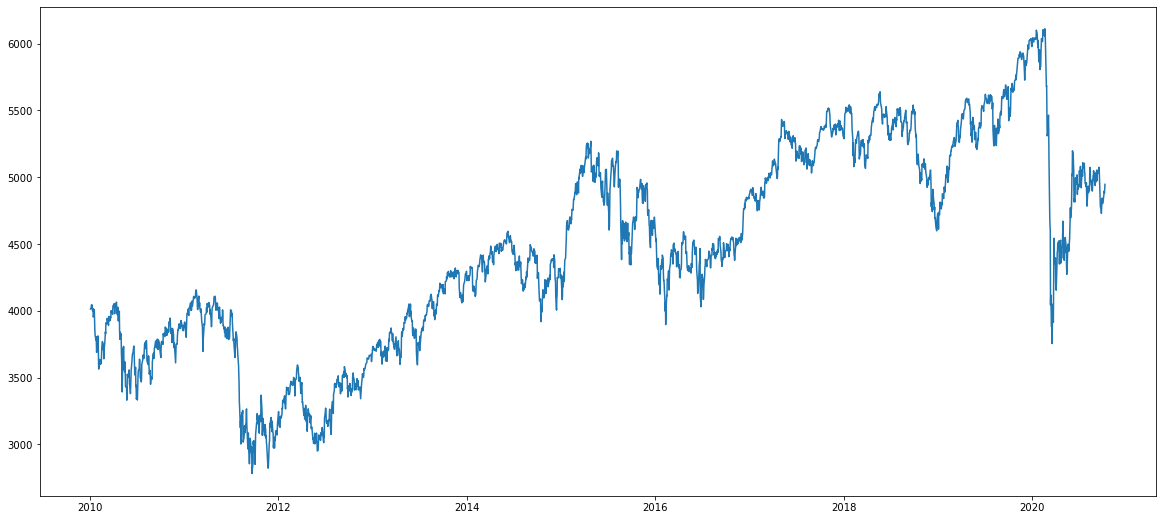

In [10]:
plt.figure(figsize = (20, 9))
plt.plot(cac)

In [56]:
#spot market
def backtest():
    investment = 100000 
    portfolio = []
    buy = False
    for j in range(1, len(cac)):
        if cac.index[j - 1] in sp.index:
            loc = sp.index.get_loc(cac.index[j - 1])
            if sp[sp.index == sp.index[loc]]['Open'][0] < sp[sp.index == sp.index[loc]]['Close'][0] and not buy:
                if len(portfolio) > 0:
                    investment = investment * (1 - ((lastSell - cac[cac.index == cac.index[j]]['Open'][0]) / lastSell))
                portfolio.append(investment)
                lastBuy = cac[cac.index == cac.index[j]]['Open'][0]
                buy = True
            if sp[sp.index == sp.index[loc]]['Open'][0] >= sp[sp.index == sp.index[loc]]['Close'][0] and buy:
                investment = investment * (1 - ((lastBuy - cac[cac.index == cac.index[j]]['Open'][0]) / lastBuy))
                portfolio.append(investment)
                lastSell = cac[cac.index == cac.index[j]]['Open'][0]
                buy = False
    return portfolio

In [57]:
portfolio = backtest()

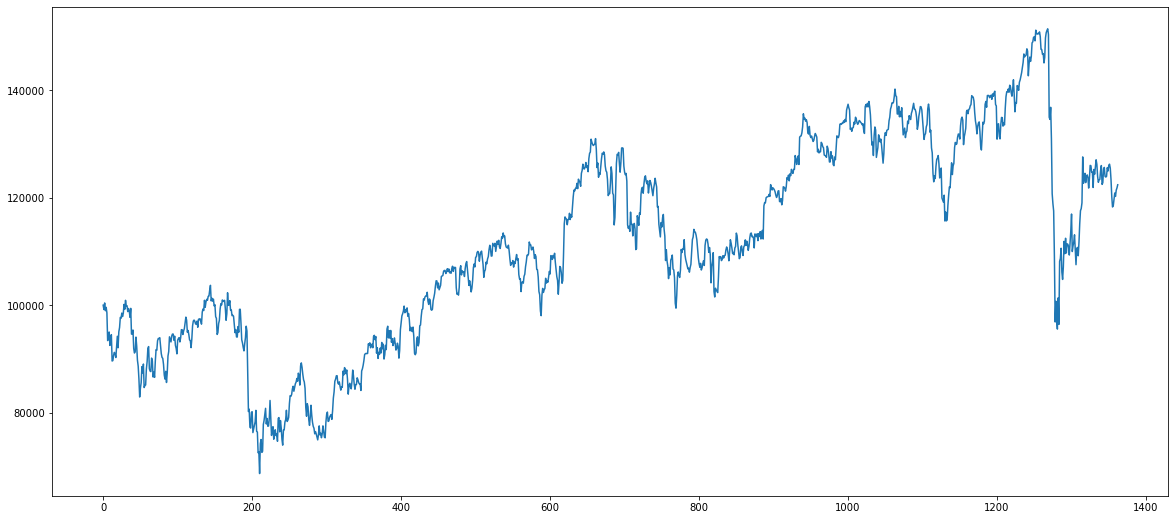

In [58]:
plt.figure(figsize = (20, 9))
plt.plot(portfolio)